In [1]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Data collection and data processing
#loading a data set to a panda Dataframe
son_data=pd.read_csv('sonar data.csv',header=None)

In [4]:
son_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
son_data.shape #for finding rows and columns

(208, 61)

In [6]:
son_data.describe() #describe statistical measure of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
son_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
son_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
# if M and R value differnce is non comperable(non equal) then we go foR HANDLING IMBALANCED DATA PROCESS 
#but here  value are 111 and 97 i.e almost equal so their is no need FOR HANDLING THIS(UNDERSAMPLING)
#for doing 
#[mine M, rock R]
#ENCODING IS USED TO CONVERT STRING RESULT VALUE INTO NUMERIC FORM

In [10]:
son_data.groupby(60).mean() #find mean of all col 60 rock and mine
                  #differnce betwen mean value is necessary

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [11]:
son_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [12]:
son_data.duplicated().sum()

0

In [13]:
#supervised learning model so its  our duty to divide it into data and labels
#drop column we set value of axis as 1
#drop row set value of axis as 0
#here we perform operation on 60 column
#in x we add all value except 60th column
#in y we add 60th column
X=son_data.drop(columns=60,axis=1)
Y=son_data[60]

In [14]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

[Text(0.5, 0, '0'),
 Text(1.5, 0, '1'),
 Text(2.5, 0, '2'),
 Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6'),
 Text(7.5, 0, '7'),
 Text(8.5, 0, '8'),
 Text(9.5, 0, '9'),
 Text(10.5, 0, '10'),
 Text(11.5, 0, '11'),
 Text(12.5, 0, '12'),
 Text(13.5, 0, '13'),
 Text(14.5, 0, '14'),
 Text(15.5, 0, '15'),
 Text(16.5, 0, '16'),
 Text(17.5, 0, '17'),
 Text(18.5, 0, '18'),
 Text(19.5, 0, '19'),
 Text(20.5, 0, '20'),
 Text(21.5, 0, '21'),
 Text(22.5, 0, '22'),
 Text(23.5, 0, '23'),
 Text(24.5, 0, '24'),
 Text(25.5, 0, '25'),
 Text(26.5, 0, '26'),
 Text(27.5, 0, '27'),
 Text(28.5, 0, '28'),
 Text(29.5, 0, '29'),
 Text(30.5, 0, '30'),
 Text(31.5, 0, '31'),
 Text(32.5, 0, '32'),
 Text(33.5, 0, '33'),
 Text(34.5, 0, '34'),
 Text(35.5, 0, '35'),
 Text(36.5, 0, '36'),
 Text(37.5, 0, '37'),
 Text(38.5, 0, '38'),
 Text(39.5, 0, '39'),
 Text(40.5, 0, '40'),
 Text(41.5, 0, '41'),
 Text(42.5, 0, '42'),
 Text(43.5, 0, '43'),
 Text(44.5, 0, '44'),
 Text(45.5, 0, '45'),
 Text(46

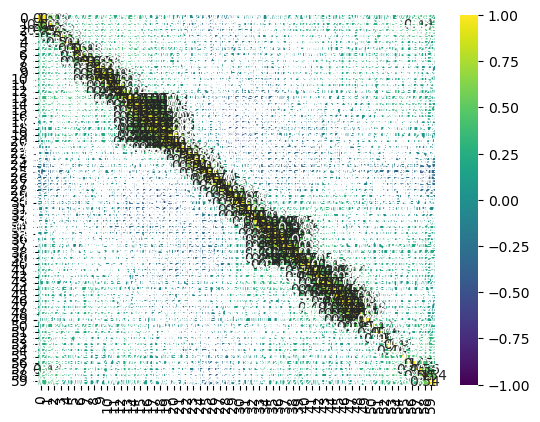

In [15]:
#Feature correlations
corr_mat=sns.heatmap(X.corr(method='spearman'),annot=True,cbar=True,
            cmap='viridis', vmax=1,vmin=-1,
            xticklabels=X.columns,yticklabels=X.columns)
corr_mat.set_xticklabels(corr_mat.get_xticklabels(),rotation=90)

In [16]:
#AFTER DATA WE HAVE TO PERFORM THE DATA STANDARIZATION (mean value to 1)PROCESS WHERE WE MAKE THE VALUES POF ALL 
#COLUMNS IN COMPRABLE RANGE
#BUT HERE ALL THE VALUE ARE ALREADY IN COMPRABLE RANGE .SO,THEIR IS NO NEED TO PERFORM STANDARIZATION
#PROCESS
#scaler=StandardScaler()

In [17]:
#scaler.fit_transform(X)

In [18]:
#NOW TIME FOR GIVING DATA TO TRAINING AND TESTING
# TRAINING AND TEST DATA

#testsize=0.1 means give 10percent of data as test data and remaining 90percent as traing data
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
#stratify=Y means data is splitted on the basis of rock and mine in equal manner
#random_state is used to splitted the data in particular order


In [19]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [20]:
print(X_train)
print(Y_train)#ytrain is realoutput

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [21]:
#model training 
#here we used logistic model
#LOGISTIC REGRESSION(CLASSIFICATION) MODEL WITH TRAINING DATA

In [22]:
model=LogisticRegression()


In [23]:
kk=model.fit(X_train,Y_train)

In [24]:
print(kk)

LogisticRegression()


In [25]:
#MODEL EVALUATION we can use kk or model any of them

In [26]:
#accuracy on training data
X_train_prediction=kk.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [27]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8342245989304813


In [28]:
#accuracy on test data
X_test_prediction=kk.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [29]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.7619047619047619


In [30]:
# making a predictive System
input_data=(0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)#model=LogisticRegression
print(prediction)
if(prediction[0]=='R'):
    print("The object is a Rock")
else:
    print("The object is a mine")

['M']
The object is a mine


In [31]:
#for decision tree we have to first encode the data of col 60,then use the function

In [32]:
label_encode=LabelEncoder()

In [33]:
labels=label_encode.fit_transform(son_data[60])

In [34]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
son_data['target']=labels

In [36]:
son_data.head(-5)  #0->mine and 1->Rock

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,...,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060,M,0
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M,0
200,0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,...,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,M,0
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,M,0


In [37]:
Ys=son_data['target']

In [38]:
Ys.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [39]:
#NOW TIME FOR GIVING DATA TO TRAINING AND TESTING
# TRAINING AND TEST DATA

#testsize=0.1 means give 10percent of data as test data and remaining 90percent as traing data
X_train,X_test,Y_train,Y_test =train_test_split(X,Ys,test_size=0.1,stratify=Y,random_state=1)
#stratify=Y means data is splitted on the basis of rock and mine in equal manner
#random_state is used to splitted the data in particular order


In [40]:
# import the regressor/classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
  
# create a regressor object
#regressor = DecisionTreeRegressor(random_state = 0) 
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
#regressor.fit(X, Ys)
pk=classifier.fit(X_train, Y_train)

In [41]:
print(pk)

DecisionTreeClassifier(criterion='entropy', random_state=0)


In [42]:
#accuracy on training data
#X_train_predictions=regressor.predict(X_train)
X_train_predictions=classifier.predict(X_train)
training_data_accuracys=accuracy_score(X_train_predictions,Y_train)

In [43]:
print('Accuracy on training data:',training_data_accuracys)

Accuracy on training data: 1.0


In [44]:
#accuracy on test data
X_test_predictions=classifier.predict(X_test)
test_data_accuracys=accuracy_score(X_test_predictions,Y_test)

In [45]:
print('Accuracy on testing data:',test_data_accuracys)

Accuracy on testing data: 0.6666666666666666


<AxesSubplot:>

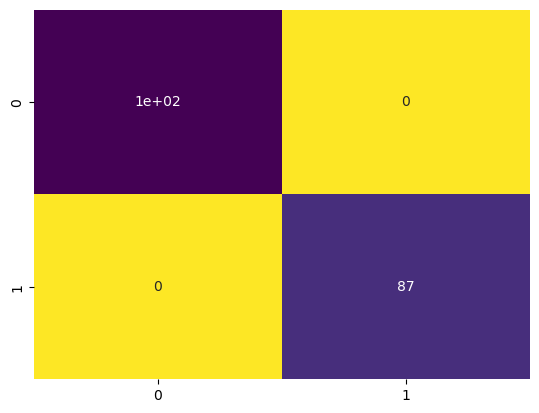

In [46]:
#Creating the Confusion matrix for training 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_train_predictions,Y_train) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=pk.classes_, xticklabels=pk.classes_)


In [47]:
print(cm)

[[100   0]
 [  0  87]]


<AxesSubplot:>

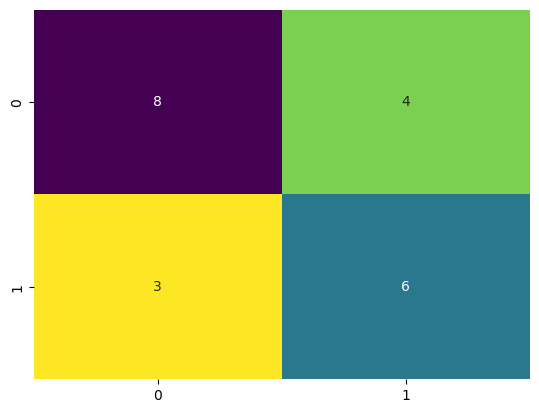

In [48]:
#Creating the Confusion matrix for testing
#le = LabelEncoder()

pp= confusion_matrix(X_test_predictions,Y_test) 
sns.heatmap(pp, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=pk.classes_, xticklabels=pk.classes_)


In [49]:
print(pp)

[[8 4]
 [3 6]]


<AxesSubplot:>

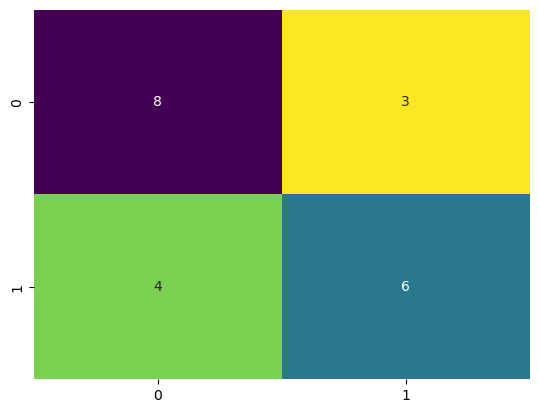

In [50]:
#Creating the Confusion matrix for overall accuracy
##Predicting the test set result  
Ypred=classifier.predict(X_test)
kp= confusion_matrix(Y_test,Ypred) 
sns.heatmap(kp, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=pk.classes_, xticklabels=pk.classes_)


In [51]:
print(kp)

[[8 3]
 [4 6]]


In [52]:
# making a predictive System
input_data=(0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)#classifier = DecisionTreeRegressor(random_state = 0) 
print(prediction)
if(prediction[0]=='R'):
    print("The object is a Rock")
else:
    print("The object is a mine")

[0]
The object is a mine


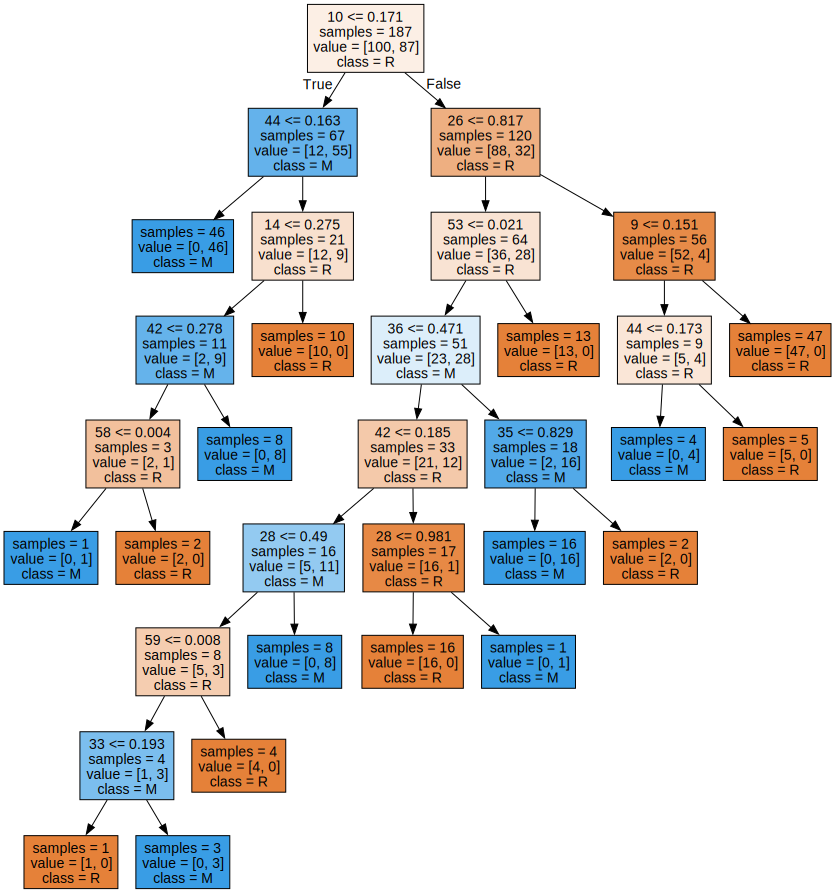

In [53]:
export_graphviz(classifier, out_file="tree.dot",class_names=Y.unique(),
                feature_names=X.columns,impurity=False,filled=True)

with open("tree.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))
